In [43]:
# importing basic libraires
import pandas as pd
import numpy as np

# importing data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as pe
#importing warnings for warning filtration
import warnings
warnings.filterwarnings('ignore')

#setting up figure parameters
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 150

%matplotlib inline

# library for logistic model
from sklearn.linear_model import LogisticRegression

# scaling and splitting data libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

Features

age - Age of participant in years
physical_score - Score achieved during physical exam
Label/Target

test_result - 0 if no pass, 1 if test passed

In [2]:
import seaborn as sns
sns.set_theme(style='darkgrid', palette='viridis')

In [3]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

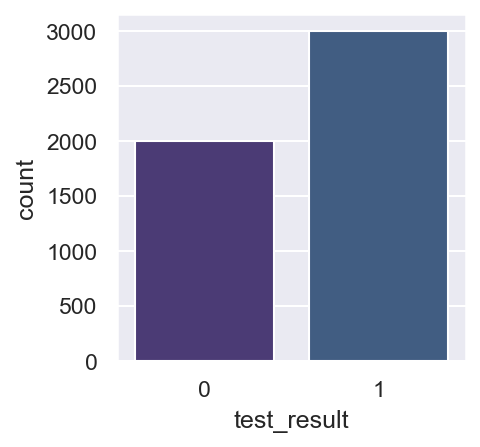

In [7]:
# visualizing distribution categories in target 
sns.countplot(data = df, x = 'test_result')

- 3000 people have passed the hearing test
- 2000 people have failed the hearing test

(0.0, 100.0)

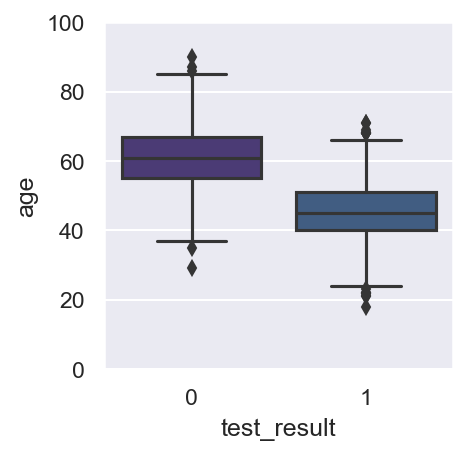

In [8]:
# visualizing age by categories of target
sns.boxplot(data = df, x = 'test_result', y = 'age')
plt.ylim(0,100)

#### age wise distribution of test_results
- in test result, 1 : test pass, 0: test fail
- people with higher age tends to fail test more than the people with younger age

<Axes: xlabel='test_result', ylabel='physical_score'>

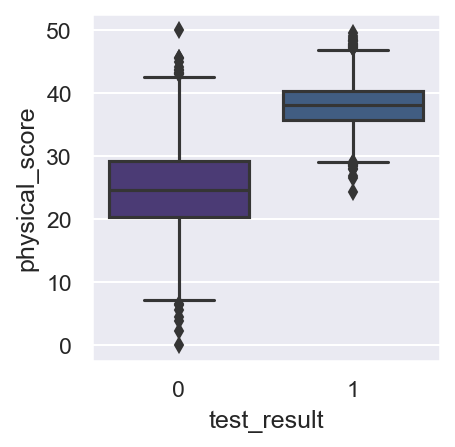

In [9]:
# visualizing physical score by categories of target
sns.boxplot(data = df, x = 'test_result', y = 'physical_score')

- higher the physical score is related to more frequency of passing the test

<Axes: xlabel='age', ylabel='physical_score'>

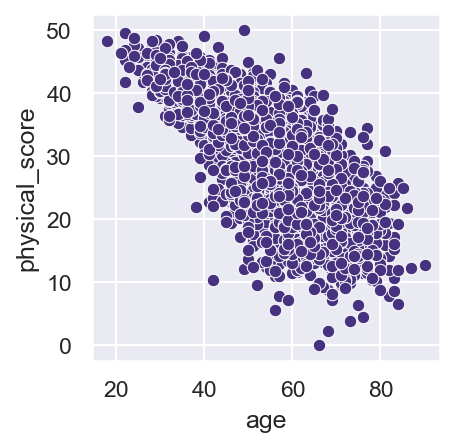

In [11]:
# scatterplot between physcial score and age
sns.scatterplot(data = df, x = 'age', y = 'physical_score')

- high negtive negative relationship between physical score and age
- as the age increases the physical score decreases

<Axes: xlabel='age', ylabel='physical_score'>

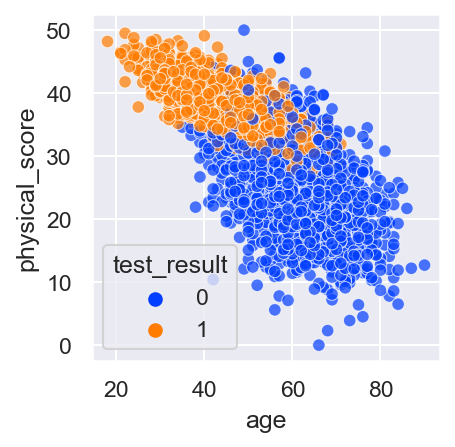

In [12]:
sns.scatterplot(data = df, x = 'age', y = 'physical_score', hue = 'test_result', 
                palette = 'bright',alpha = 0.7)

- people with higher physical socres are more likely to pass test and are younger in age
- people with lower physical scores are more likely to fail the test are older in age

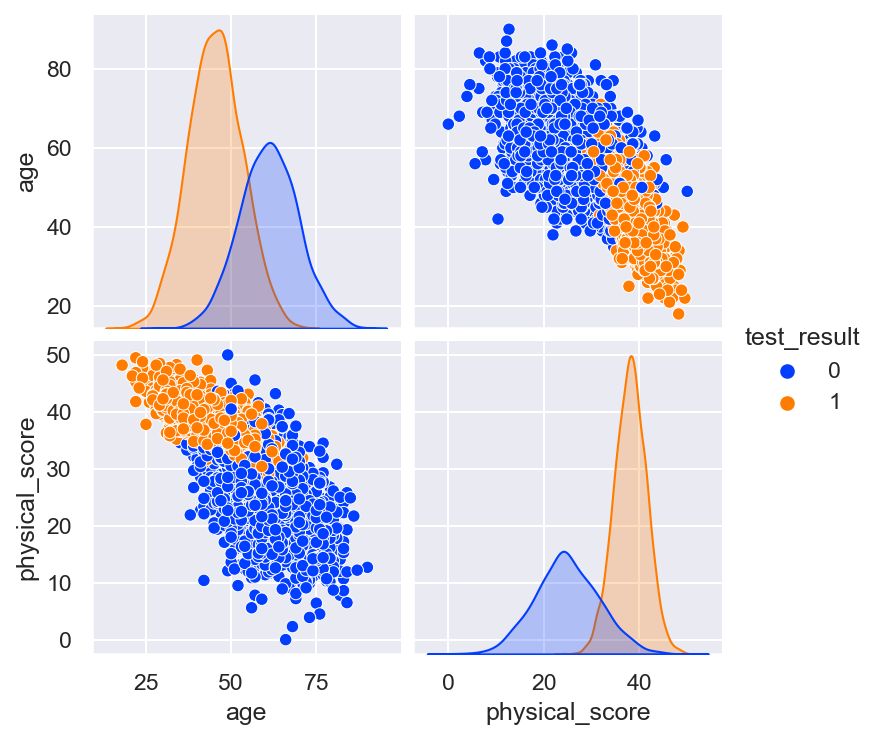

In [13]:
sns.pairplot(data = df,hue = 'test_result',palette = 'bright')

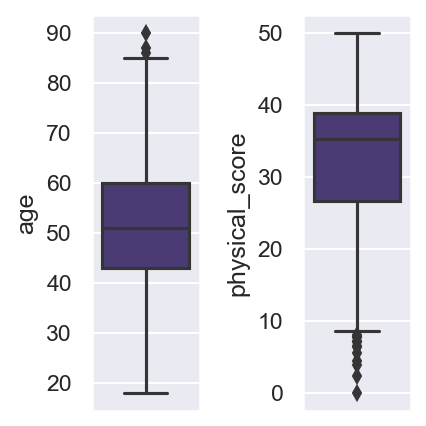

In [14]:
# boxplot to check for outliers
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'age')
plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'physical_score')
plt.tight_layout()

In [17]:
# function to detect upper & lowe limit of a given column
def outlier_dectect(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    return print(f'upper limit of {col} is {upper}\n lower limit of {col} is {lower}')

In [16]:
# CAPPING - imputing outliers with the lowe limit
outlier_dectect(df,'age')

upper limit of age is 85.5
 lower limit of age is 17.5


In [ ]:
df[df['age']>85] 

In [ ]:
df.loc[df['age']>85,'age'] = 85

In [ ]:
outlier_dectect(df,'physical_score')

In [ ]:
df[df['physical_score']<8.4]

In [ ]:
df.loc[df['physical_score']< 8.4,'physical_score'] = 8.4

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'age')
plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'physical_score')
plt.tight_layout()

<Axes: >

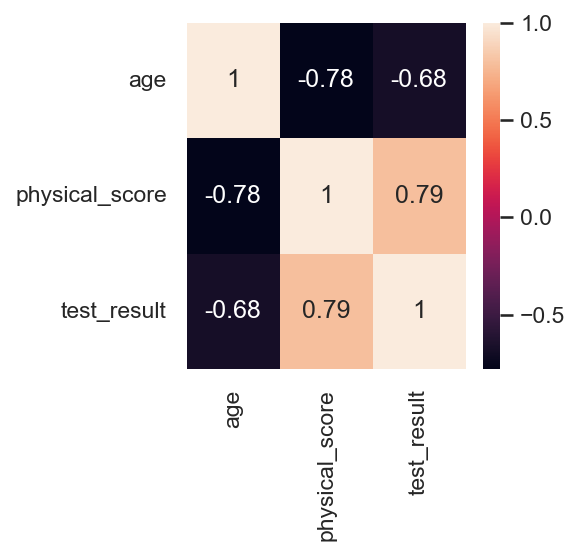

In [19]:
# correlation analysis
sns.heatmap(df.corr(), annot=True)

- age and test results are negatively correlated, as age increases, test results tends to decrease in our case towards 0 (failing the test)
-  physical score and test results are  positvly correlated, as the physical score  increases the test score increases as well, in our case towards 1 (passing the test)

In [21]:
# 3d scatterplot of , targt, age and physical score divided by target
pe.scatter_3d(df, x = 'test_result',y = 'age',z = 'physical_score',color = 'test_result')

In [25]:
# features and target
x = df.drop('test_result',axis = 1) # same as df[['age','physical_score']]
y = df['test_result']

In [26]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3,random_state=101)

In [27]:
# instance of standard scalar
sc = StandardScaler()

In [28]:
# fiting and trasfroming the x_train
x_train_scaled = sc.fit_transform(x_train)

In [29]:
# transforming x_test
x_test_scaled = sc.transform(x_test)

In [30]:
# creating a model instance
model = LogisticRegression()

In [34]:
# fitting the model
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [35]:
# checking model coefficients
model.coef_

array([[-1.06771187,  3.0806319 ]])

In [36]:
# making preditcions on x_test
y_pred = model.predict(x_test_scaled)

In [37]:
# printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1392
           1       0.93      0.94      0.93      2108

    accuracy                           0.92      3500
   macro avg       0.92      0.91      0.92      3500
weighted avg       0.92      0.92      0.92      3500



In [40]:
confusion_matrix(y_test,y_pred)

array([[1233,  159],
       [ 124, 1984]], dtype=int64)

<Axes: >

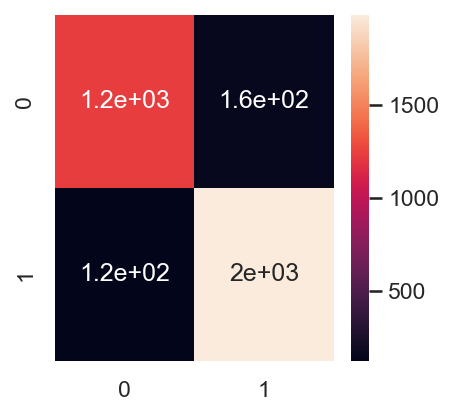

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [41]:
# generating probability estimates
proba = model.predict_proba(x_test_scaled)[:,1]
proba

array([0.97178848, 0.96513096, 0.01644394, ..., 0.04666688, 0.01995296,
       0.97496991])

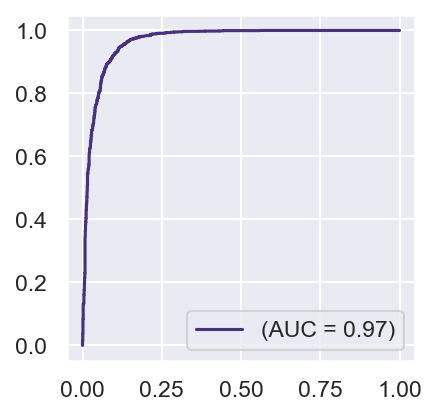

In [47]:
# generating AUC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()